# Gradient Descent & Stochastic Gradient Descent

### Setup

In [2]:
%matplotlib notebook
#for numeric operations
import numpy as np

#for ploting beauty plots
import matplotlib.pyplot as plt



### Gradient Descent (GD)

\begin{align}
w_{k+1} := w_k - \mu \nabla f(w_k) \\ \\
\mu - learning \ rate \\
k - current \ step \\
\end{align}

### Stochastic Gradient Descent (SGD)

\begin{align}
w := w - \mu \nabla f(w) = w - \mu \sum_{i=1}^n {\nabla f_i(w)\over n}\\ \\
\mu - learning \ rate \\
k - current \ step \\
\end{align}

Let's define simple function

In [3]:
def function(x):
    return ((x-5)**2 - 20)

*Derivative* of the function

In [4]:
def d_function(x):
    return 2*(x-5)

In [5]:
x = np.linspace(-10, 20, 200)
y = function(x)

<IPython.core.display.Javascript object>


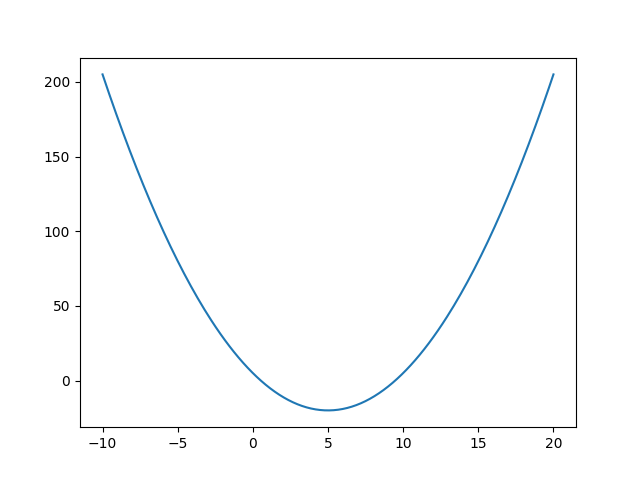

In [6]:
plt.close()
plt.plot(x, y)
plt.show()

In [1]:
#for creating gradient animation
import matplotlib.animation as animation

plt.close()
fig = plt.figure()

def grad_descend_step(param, lr):
    global ax
    y_param = function(param)
    ax.scatter(param, y_param, color = 'red')
    return param - lr * d_function(param)

def animate(i):
    global x_0, ax
    if i % 20 == 0:
        x_0 = 15
        ax.clear()
        ax.plot(x, y)
    x_0 = grad_descend_step(x_0, 0.1) #magic

#starting point
x_0 = 15
#for animation
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)

animation.FuncAnimation(fig, animate, frames=20, interval=500, repeat=True, repeat_delay=2000)

NameError: name 'plt' is not defined

### SGD vs GD

First, we create some random 2d points

<IPython.core.display.Javascript object>


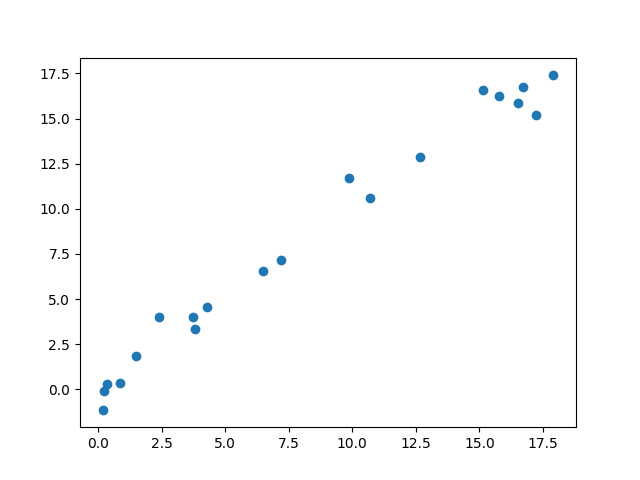

In [7]:
point_count = 20
x = np.random.uniform(0, 20, size=(point_count,))
y = x + np.random.randn(point_count)

# print(np.concatenate([x.reshape(point_count, 1), y.reshape(point_count, 1)], axis=1))

plt.close()
plt.scatter(x, y)
plt.show()

In [20]:
def evaluate(W, b, x):
    return W*x + b

#### lets define function we want to minimize, in most cases we will call this function loss function, but now for sake of clarity leave as it is

\begin{align}
{1 \over n} \sum_{i=1}^n ( W * X + b - Y_i ) ^ 2
\end{align}

In [21]:
def mean_square_dist(W, b, x, y): # function we want to minimize, in most cases called 
    
    y_hat = evaluate(W, b, x)
    
    dists = (y_hat - y)**2
    
    return dists.mean()

#### As was discussed previously lets define derivative of the function we want to minimize, w.r.t. every parameter (W, b)

\begin{align}
"W" parameter :=   
{2 \over n} \sum_{i=1}^n ( W*X + b - Y_i ) * X \\
"B" parameter :=   
{2 \over n} \sum_{i=1}^n ( W*X + b - Y_i )
\end{align}

In [22]:
def d_W(W, b, x, y):
    y_hat = evaluate(W, b, x)
    
    error = 2*(y_hat-y)*x
    
    return error.mean()

def d_b(W, b, x, y):
    y_hat = evaluate(W, b, x)
    
    error = 2*(y_hat-y)
    return error.mean()

def d_mean_square_dist(W, b, x, y):
    return (d_W(W, b, x, y), d_b(W, b, x, y))

In [23]:
W = np.random.rand()
b = 0

<IPython.core.display.Javascript object>


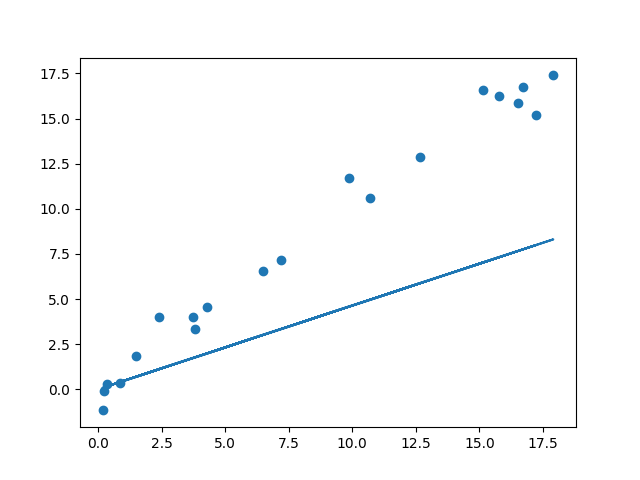

31.90334099420462

In [24]:
plt.close()
plt.scatter(x, y)
plt.plot(x, evaluate(W, b, x))
plt.show()

mean_square_dist(W, b, x, y)

### GD

Starting parameters

In [12]:
W = np.random.rand()
b = 0
lr = 0.001
num_steps = 20

Function to animate gd

In [13]:
def animate_gd(i):
    global W, b, ax1, ax2, num_steps
    
    if(i == 0):
        W = np.random.rand()
        b = 0
        ax2.clear()
        
    ax1.clear()
    ax1.scatter(x, y)
    ax1.plot(x, evaluate(W, b, x))
    
    loss = mean_square_dist(W, b, x, y)
    ax2.scatter(i, loss)
    
    dW, db = d_mean_square_dist(W, b, x, y)
    
    W = W - lr*dW
    b = b - lr*db

Let's see how our gradient works

<IPython.core.display.Javascript object>


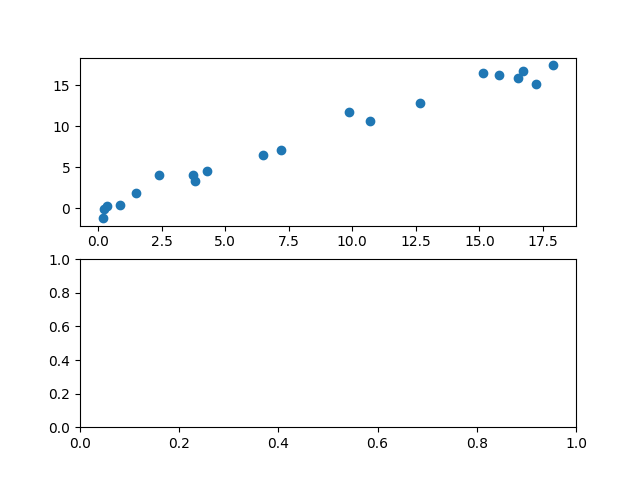

In [14]:
plt.close()
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

anim = animation.FuncAnimation(fig, animate_gd, frames=num_steps, interval=500, repeat=True, repeat_delay=2000)

### SGD

Starting parameters

In [16]:
W = np.random.rand()
b = 0
lr = 0.001
num_steps = 20
batch_size = 5

Function to animate gd

In [17]:
def animate_gd(i):
    global W, b, ax1, ax2, num_steps
    
    if(i == 0):
        W = np.random.rand()
        b = 0
        ax2.clear()
        
    ax1.clear()
    ax1.scatter(x, y)
    ax1.plot(x, evaluate(W, b, x))
    
    idx = np.random.randint(0, len(x), batch_size)
    
    loss = mean_square_dist(W, b, x[idx], y[idx])
    ax2.scatter(i, loss)
    
    dW, db = d_mean_square_dist(W, b, x[idx], y[idx])
    
    W = W - lr*dW
    b = b - lr*db

Magic SGD

<IPython.core.display.Javascript object>


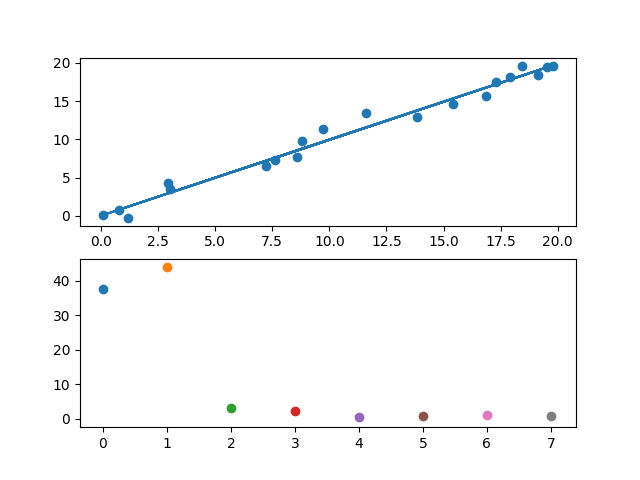

In [18]:
plt.close()
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

anim = animation.FuncAnimation(fig, animate_gd, frames=num_steps, interval=500, repeat=True, repeat_delay=2000)

As you can see we are using 4 times less computations while still aproaching minimum

##### Q1: how doest batch size influence training? 